In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
import warnings
warnings.filterwarnings("ignore")

In [116]:
from sklearn.datasets import fetch_openml
elect_data=fetch_openml(data_id=44033 ,as_frame=True)

In [117]:
type(elect_data)

sklearn.utils._bunch.Bunch

In [118]:
elect_data.data.shape

(38474, 8)

In [119]:
df=pd.DataFrame(elect_data.data)

In [120]:
df.to_csv("electricity_data.csv", index=False)

In [121]:
elect_data.details

{'id': '44033',
 'name': 'electricity',
 'version': '9',
 'description_version': '1',
 'format': 'arff',
 'creator': ['M. Harries', 'J. Gama', 'A. Bifet'],
 'contributor': 'Leo Grin',
 'collection_date': '1998-12-05',
 'upload_date': '2022-06-18T12:44:01',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://openml.org/data/v1/download/22103121/electricity.arff',
 'parquet_url': 'https://openml.org/datasets/0004/44033/dataset_44033.pq',
 'file_id': '22103121',
 'default_target_attribute': 'class',
 'version_label': '1',
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2022-06-18 12:44:03',
 'md5_checksum': 'e80c7f6d22129526f4b7c6b62a480620'}

In [122]:
print(elect_data.DESCR)

Dataset used in the tabular data benchmark https://github.com/LeoGrin/tabular-benchmark,  
                          transformed in the same way. This dataset belongs to the "classification on categorical and
                          numerical features" benchmark. Original description: 
 
**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to 

In [123]:
elect_data.feature_names

['date',
 'day',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer']

In [124]:
elect_data.target_names

['class']

In [125]:
elect_df=elect_data.frame

In [126]:
type(elect_df)

pandas.core.frame.DataFrame

<a name='3'></a>
## 3 - Exploratory Data Analysis

Before doing exploratory analysis, as always, let's split the data into training and test sets.

In [127]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(elect_df, test_size=0.25, random_state=42)
print("The size of training data is: {} \nThe size of testing data is: {}".format(len(train_data),len(test_data)))

The size of training data is: 28855 
The size of testing data is: 9619


In [128]:
train_data.dtypes.value_counts()

float64     7
category    1
object      1
Name: count, dtype: int64

In [129]:
train_data.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
27234,0.443122,4,0.382979,0.060796,0.568730,0.004165,0.576903,0.420175,UP
34428,0.889164,3,0.021277,0.031884,0.472925,0.002113,0.423356,0.561404,UP
29539,0.460643,4,0.787234,0.216194,0.644154,0.014526,0.564992,0.452632,UP
13469,0.912084,6,0.936170,0.044194,0.342160,0.002910,0.270585,0.673246,DOWN
38144,0.912084,6,0.297872,0.067611,0.379203,0.004420,0.369239,0.740351,UP


In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28855 entries, 27234 to 15795
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       28855 non-null  float64 
 1   day        28855 non-null  category
 2   period     28855 non-null  float64 
 3   nswprice   28855 non-null  float64 
 4   nswdemand  28855 non-null  float64 
 5   vicprice   28855 non-null  float64 
 6   vicdemand  28855 non-null  float64 
 7   transfer   28855 non-null  float64 
 8   class      28855 non-null  object  
dtypes: category(1), float64(7), object(1)
memory usage: 2.0+ MB


In [131]:
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
date,28855.0,0.497798,0.340491,0.0,0.031857,0.456219,0.880514,1.000000
period,28855.0,0.508706,0.290427,0.0,0.276596,0.510638,0.765957,1.000000
nswprice,28855.0,0.060188,0.042393,0.0,0.036208,0.051159,0.075883,0.981806
nswdemand,28855.0,0.434650,0.161721,0.0,0.322374,0.452246,0.542398,1.000000
vicprice,28855.0,0.003563,0.011157,0.0,0.002354,0.003467,0.003467,1.000000
vicdemand,28855.0,0.427778,0.120910,0.0,0.382703,0.422915,0.479026,1.000000
transfer,28855.0,0.497238,0.152420,0.0,0.414912,0.414912,0.599561,0.959211


In [132]:
train_data.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

### Checking Correlation

In [133]:
numerical_cols=train_data.select_dtypes(include=['float64','int64'])
corr=numerical_cols.corr()

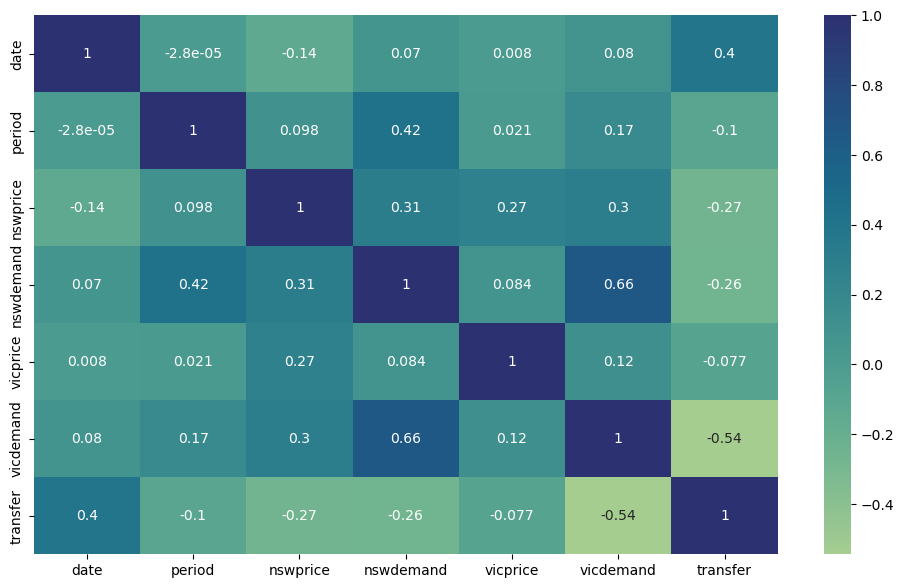

In [134]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

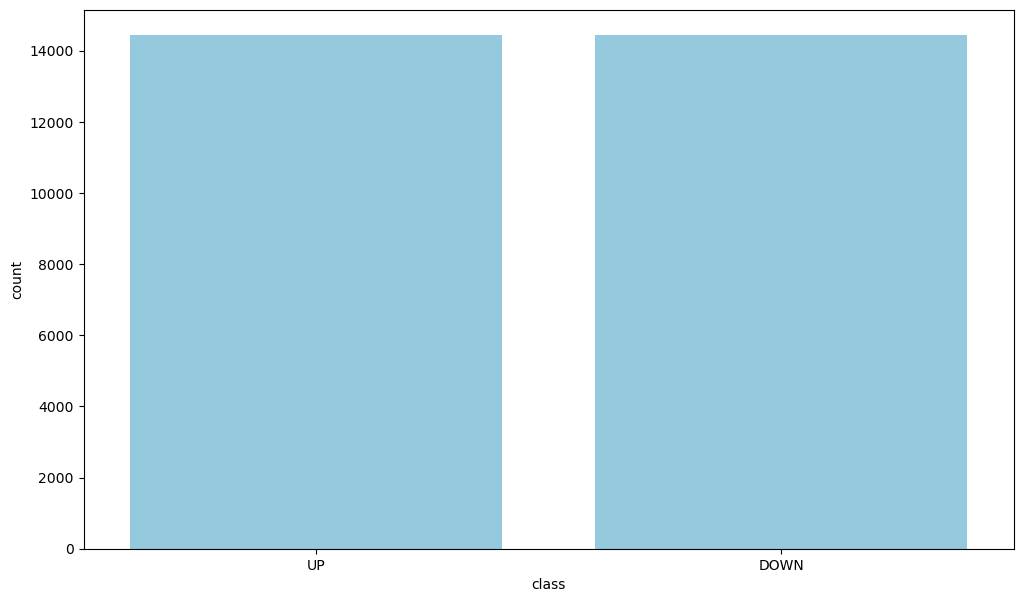

In [135]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_data, x='class',color='skyblue')
plt.show()

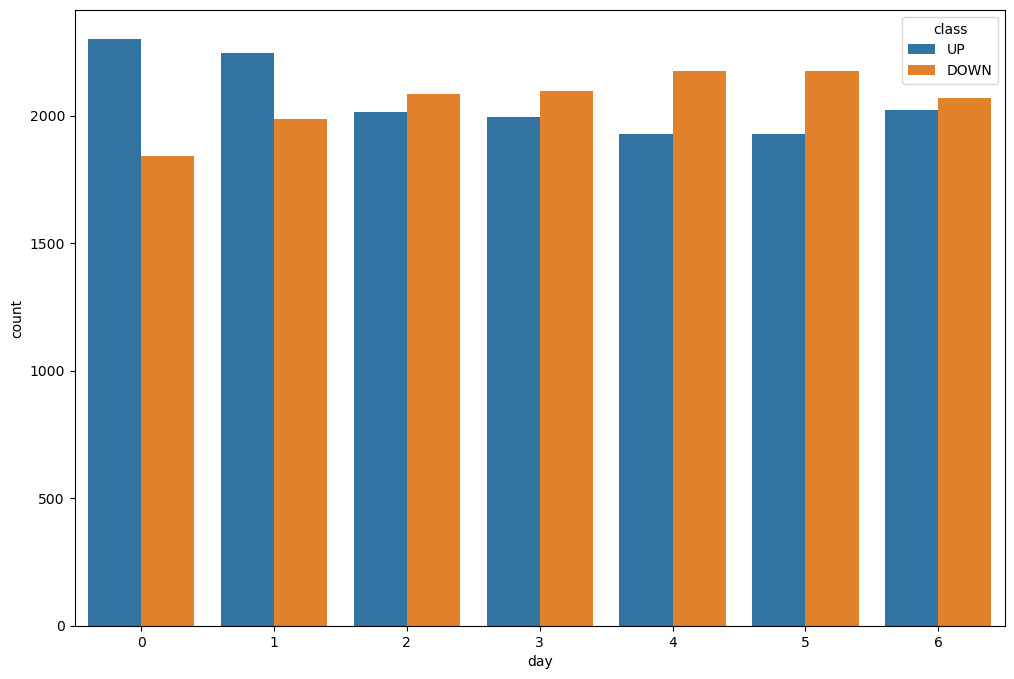

In [136]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='day', hue='class')
plt.show()

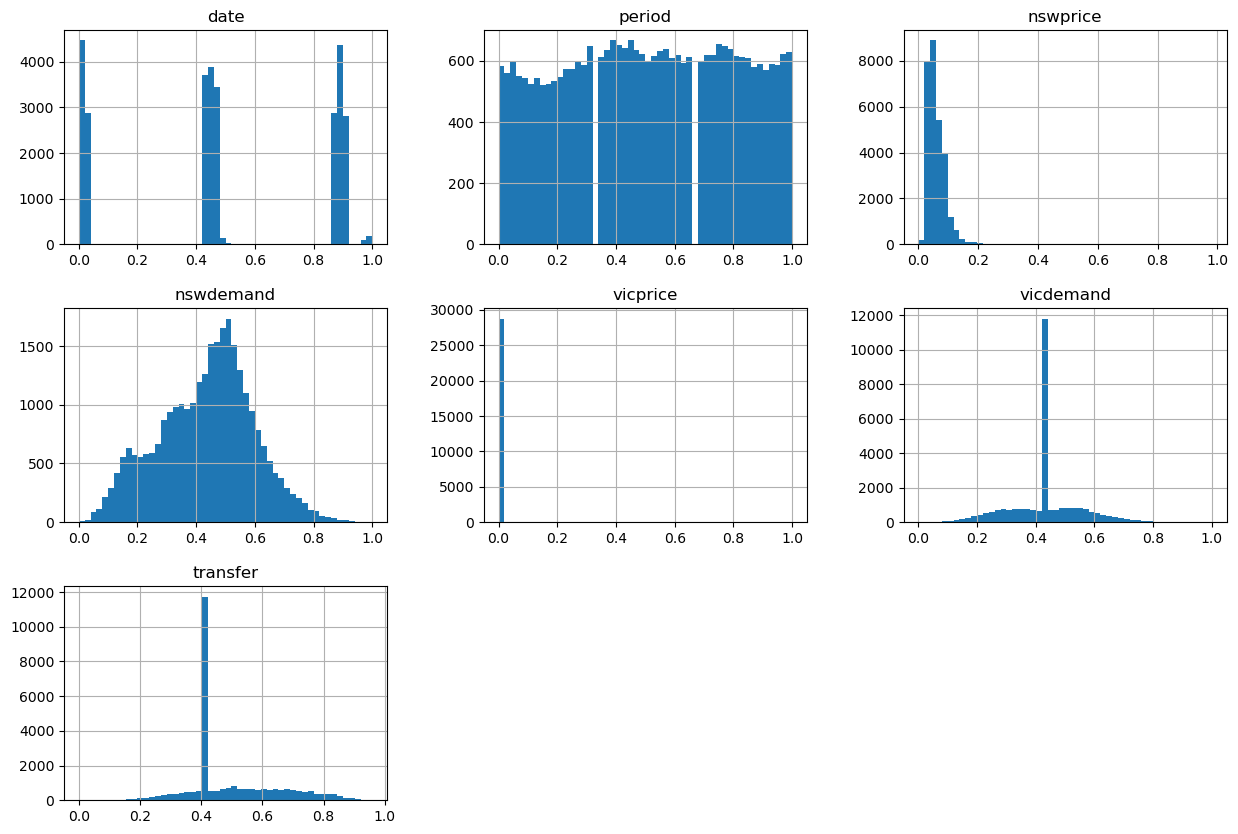

In [137]:
train_data.hist(bins=50, figsize=(15,10))
plt.show()

In [138]:
X_train=train_data.drop('class', axis=1)
y_train=train_data['class']

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_prepared=le.fit_transform(y_train)

In [140]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_classifier=BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,max_features=0.5,bootstrap=False
)
bag_classifier.fit(X_train, y_train_prepared)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5)

In [141]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


In [142]:
y_train_pred=bag_classifier.predict(X_train)

In [143]:
accuracy_score(y_train_prepared,y_train_pred)

0.9798301854098077

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf=GradientBoostingClassifier(
    n_estimators=450,
    learning_rate=0.5,
    random_state=42,
    max_depth=2
    )
grad_boost_clf.fit(X_train,y_train_prepared)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=450,
                           random_state=42)

In [180]:
y_grad_pred=grad_boost_clf.predict(X_train)

In [182]:
accuracy_score(y_train_prepared,y_grad_pred)

0.9066366314330272

In [183]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(grad_boost_clf, X_train, y_train_prepared, cv=5)

In [187]:
print(scores.mean())

0.8805752902443251


In [188]:
bag_scores=cross_val_score(bag_classifier,X_train, y_train_prepared, cv=5)
print(bag_scores.mean())    

0.857875584820655


In [193]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf=AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=400,
    learning_rate=0.5
)

adaboost_clf.fit(X_train,y_train_prepared)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=3),
                   learning_rate=0.5, n_estimators=400)

In [194]:
ada_pred=adaboost_clf.predict(X_train)

In [195]:
accuracy_score(y_train_prepared,ada_pred)

0.8355224397851325

In [196]:
X_test=test_data.drop('class', axis=1)
y_test=test_data['class']

In [197]:
y_test_prepared=le.transform(y_test)


In [198]:
y_test_pred=grad_boost_clf.predict(X_test)

In [199]:
accuracy_score(y_test_prepared,y_test_pred)

0.8868905291610355

In [202]:
y_bag_pred=bag_classifier.predict(X_test)

In [204]:
accuracy_score(y_test_prepared, y_bag_pred)

0.8639151678968707

In [205]:
ada_pred=adaboost_clf.predict(X_test)

In [206]:
accuracy_score(y_test_prepared,ada_pred)

0.8337665037945733